## 9. EDOs de 2ª ordem e diferenças finitas

### Derivada de 1ª ordem em uma variável

A aproximação numérica para a derivada de 1ª ordem de uma função $y=f(x)$ em um ponto $x_i$ pode ser obtida por diferença finita, em que a inclinação da função é estimada usando valores da função na vizinhança do ponto. 

Chamamos aproximação _**para frente**_ quando se estima $f'(x_i)$ usando a inclinação da reta secante que passa pelos pontos $(x_i, f(x_i))$ e $(x_{i+1}, f(x_{i+1}))$. A aproximação _**para trás**_ é quando usamos a inclinação da reta que passa pelos pontos $(x_{i-1}, f(x_{i-1}))$ e $(x_{i}, f(x_{i}))$. E a aproximação _**central**_ é quando usamos a inclinação da reta que passa pelos pontos $(x_{i-1}, f(x_{i-1}))$ e $(x_{i+1}, f(x_{i+1}))$.

A seguir são mostradas as fórmulas e uma representação geométrica  que ilustra a aproximação de $f'(x_i)$ _para frente_, _para trás_ e _central_ respectivamente: 


$$f'(x_i) \simeq \frac{f(x_{i+1}) - f(x_i)}{x_{i+1}-x_i} \quad\quad\quad\quad\quad
f'(x_i) \simeq \frac{f(x_{i}) - f(x_{i-1})}{x_i-x_{i-1}} \quad\quad\quad\quad\quad
f'(x_i) \simeq \frac{f(x_{i+1}) - f(x_{i-1})}{x_{i+1}-x_{i-1}}$$


<img src="imagens/diffs.png" width="960">


As fórmulas de diferenças finitas mostradas acima podem ser obtidas a partir da série de Taylor para a função $f(x)$ desenvolvida em torno de $x=x_i$ o que nos fornece

$$f(x) = f(x_i) + f'(x_i)(x - x_i) + f''(x_i)\frac{(x - x_i)^2}{2!} + f'''(x_i)\frac{(x - x_i)^3}{3!} + \cdots$$

Ao aproximarmos $x_{i+1}$ por $x_i$, se considerarmos $h=x_{i+1}-x_i$ suficientemente pequeno, podemos desprezar os termos de ordem mais alta, proporcionais a $(x_{i+1}-x_i)^2$, $(x_{i+1}-x_i)^3$,$ \dots$. 

Assim, a derivada de $f(x)$ em $x_i$ pode ser aproximada por

$$f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{h} $$

Que é exatamente a fórmula para a aproximação _para frente_ da derivada 1ª de $f$. Observe que nessa aproximação foram desprezados os termos 

$$ O(h^2) = \frac{f''(x_i)h^2}{2} + \frac{f'''(x_i)h^3}{6} + \frac{f''''(x_i)h^4}{24} + \frac{f'''''(x_i)h^5}{120} +\cdots$$

o que mostra que o erro de truncamento depende de $h$. Quanto menor o _passo_ $h$ menor será o erro, no entanto maior será o esforço computacional, o que impossibilita o cálculo com valores de $h$ próximos de zero. 

### Derivada de 2ª ordem em uma variável

Da mesma forma que a derivada primeira pode ser aproximada em termos da variação da função em dois pontos, a derivada segunda pode ser aproximada em termos da variação na derivada primeira em dois pontos. Por exemplo, considerando as expanções em série de Taylor de $f$ em torno de $x_i$ e calculando a função em $x_{i-1}$ e $x_{i+1}$ obtemos:

$$f(x_{i-1}) = f(x_i) - hf'(x_i) + \frac{h^2f''(x_i)}{2} - \frac{h^3f'''(x_i)}{6} + \dots$$

e

$$f(x_{i+1}) = f(x_i) + hf'(x_i) + \frac{h^2f''(x_i)}{2} + \frac{h^3f'''(x_i)}{6} + \dots$$

Somando as duas equações acima obtemos:

$$f(x_{i-1}) + f(x_{i+1}) = 2f(x_i) + h^2f''(x_i) + \frac{h^4f''''(x_i)}{24} + \dots$$

que, desprezando os termos com derivadas de 4ª ordem ou maiores, nos dá a seguinte aproximação para a derivada
segunda:


$$ f''(x_i) \approx \frac{f(x_{i+1}) - 2f(x_i) + f(x_{i-1})}{h^2}$$

**Exemplo 9.1:** A derivada segunda de $f(x)=sen^2(x)$ é dada por $f''(x)=2\left(-\sin ^2(x)+\cos ^2(x)\right)$. Vamos calcular as derivadas numericamente usando 2 pontos em torno de $x_i$  em um conjunto de 21 pontos de discretização do intervalo $[0, 2\pi]$ e comparar os gráficos.

In [11]:
import sympy as sp
x = sp.symbols('x')
(sp.sin(x)**2).diff(x,x)

2*(-sin(x)**2 + cos(x)**2)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(4,3)

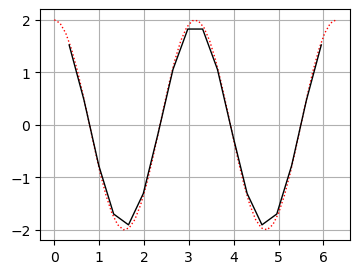

In [17]:
# criando uma lista de pontos para o gráfico 
x = np.linspace(0, 2*np.pi, 50)

xi = np.linspace(0, 2*np.pi, 20)
h=(xi[-1]-xi[0])/(len(xi)-1)
f = lambda x: np.sin(x)*np.sin(x)

# calculando as derivadas 2ªs numéricas com 2 pontos
dxi2 = (f(xi[2:])-2*f(xi[1:-1])+f(xi[0:-2]))/(h**2)

plt.plot(x,2*(-np.sin(x)**2+np.cos(x)**2), ':',color='r', linewidth=1) 
plt.plot(xi[1:-1], dxi2, '-', color='k', linewidth=1)
plt.grid()

### Método de diferenças finitas

Consiste na reformulação do problema contínuo em um problema discreto usando fórmulas de diferenças finitas tomadas sobre uma malha discretizada do domínio do problema.

Vamos apresentar esse método por meio de um exemplo (adaptado de https://www.ufrgs.br/reamat/CalculoNumerico).

**Exemplo 3:** Seja o problema de valor de contorno $-y'' = 100(x-1)^2$, $0<x<1$, $y(0)=0$ e $y(1)=0$.

Vamos usar a fórmula de diferenças finitas central de ordem 2 para discretizar a derivada em uma malha uniforme de 11 pontos. 

In [27]:
xi = np.linspace(0, 1, 11)
xi

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

A fórmula de diferenças finitas de ordem 2 nos diz que

$$ y''(x_i) \approx \frac{y_{i-1} - 2y_i + y_{i+1}}{h^2}$$

substituindo na equação, obtemos:

$$-\frac{y_{i-1} - 2y_i + y_{i+1}}{h^2} = 100(x_i-1)^2$$

como $h = 0,1$ podemos escrever 

$$y_{i-1} - 2y_i + y_{i+1} = (x_i-1)^2$$

fazendo $i=1,...9$ na equação acima, juntamente com as condições de contorno $y_0=0$ e $y_{10}= 0$, obtemos o seguinte sistema linear 11x11.

$$ \begin{cases} 
y_{0} = 0\\
y_{0} -2 y_{1} + y_{2}  = (-0,9)^2\\ 
y_{1} -2 y_{2} + y_{3}  = (-0,8)^2\\ 
y_{2} -2 y_{3} + y_{4}  = (-0,7)^2\\ 
\vdots\\
y_{8} -2 y_{9} + y_{10}  = (-0,1)^2\\ 
y_{10} = 0\\ 
\end{cases} $$


cujas matrizes podem ser obtidas como é mostrado a seguir

In [28]:
A = np.identity(11)
for i in range(1,10):
    A[i,i-1:i+2] = np.array([1,-2,1])
print(A)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [29]:
b = -(xi-1)**2
b[0]=0
b

array([ 0.  , -0.81, -0.64, -0.49, -0.36, -0.25, -0.16, -0.09, -0.04,
       -0.01, -0.  ])

cuja solução pode ser obtida fazendo

In [30]:
yi= np.linalg.solve(A,b)
yi

array([ 0.   ,  2.025,  3.24 ,  3.815,  3.9  ,  3.625,  3.1  ,  2.415,
        1.64 ,  0.825, -0.   ])

Esta é a solução numérica do problema de valor de contorno dado. Podemos obter a solução analítica usando SymPy e plotar os fráficos para comparar os reultados.

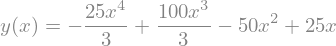

In [31]:
import sympy as sp
sp.init_printing()

x = sp.symbols('x')
y = sp.Function('y')(x)
eq = y.diff(x,x)+100*(x-1)**2
sol = sp.dsolve(eq, y, ics={y.subs(x, 0):0, y.subs(x, 1): 0})
sol

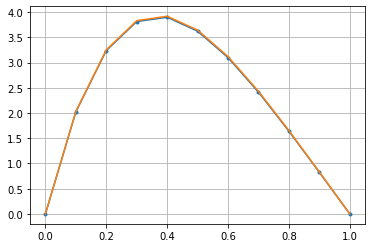

In [37]:
# converte de simbolico para numérico
y_ex = sp.lambdify(x,sol.rhs)
# plota
plt.plot(xi,yi,'.-', xi, y_ex(xi))
plt.grid()

In [40]:
err = np.mean((yi-y_ex(xi))**2)
print('Erro quadrático médio:',err)

Erro quadrático médio: 0.0002104166666666658


Agora, juntando tudo em um único script, usando um número maior de pontos, obtemos:

Erro quadrático médio (101 pontos): 2.2918958339434085e-08


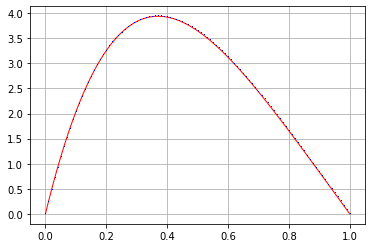

In [47]:
N = 101
h = 1/(N-1)
xi = np.linspace(0, 1, N)
A = np.identity(N)

for i in range(1,N-1):
    A[i,i-1:i+2] = np.array([1,-2,1])

b = -(100*h**2)*(xi-1)**2
b[0]=0

yi= np.linalg.solve(A,b)
y_ex = -25*xi**4/3 + 100*xi**3/3 - 50*xi**2 + 25*xi

err = np.mean((yi-y_ex)**2)
print('Erro quadrático médio (101 pontos):',err)

plt.plot(xi,yi,'r-', lw=1)
plt.plot(xi,y_ex,'b,', )
plt.grid()
plt.show()

**Exemplo 4:** Use o método de diferenças finitas para resolver o seguinte problema de valor de contorno:

$$ \begin{cases} 
-y'' + y= e^{-x} \,\text{, } \,\,\,0,5<x<1,5\\
y(0,5)= 1\\ 
y(1,5)= 2
\end{cases} $$

Para tanto, use a fórmula de diferenças finitas central de ordem 2 para discretizar a derivada em uma malha uniforme com passo $h=0,1$. Faça, então, um esboço do gráfico da solução computada.

Substituindo $ y''(x_i)$ por $\frac{y_{i-1}-2y_i+y_{i+1}}{h^2}$, com $h=0,1$, na equação e simplificando obtém-se um sistema linear. 

As equações do sistema serão dadas por 


$$ \begin{cases} 
y_0 = 1\\
-y_0 + 2,01y_1 - y_1= 0,01e^{-0,1}\\ 
-y_1 + 2,01y_2 - y_3= 0,01e^{-0,2}\\ 
-y_2 + 2,01y_3 - y_4= 0,01e^{-0,3}\\ 
\vdots \\
-y_8 + 2,01y_9 + y_{10}= 0,01e^{-0,9}\\
y_{10}= 2
\end{cases} $$

Computacionalmente podemos encontrar a solução seguindo os passos descritos a seguir. Primeiro entramos com os dados do problema.

In [48]:
N = 11
x0 = 0.5
xn = 1.5
h = (xn-x0)/(N-1)
xi = np.linspace(x0, xn, N)  

Então construímos as matrizes $A$ e $b$.


In [49]:
A = np.zeros((N,N))  
b = np.zeros(N)  
 
A[0,0] = 1  
b[0] = 1  

for i in np.arange(1,N-1):
    A[i,i-1] = -1  
    A[i,i] = 2+h**2
    A[i,i+1] = -1  
    b[i] = h**2*np.exp(-xi[i])  
A[N-1,N-1] = 1  
b[N-1] = 2  
print(A)

[[ 1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [-1.    2.01 -1.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   -1.    2.01 -1.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.   -1.    2.01 -1.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   -1.    2.01 -1.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.   -1.    2.01 -1.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.   -1.    2.01 -1.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.   -1.    2.01 -1.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.   -1.    2.01 -1.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.   -1.    2.01 -1.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.  ]]


In [50]:
print(b)

[1.         0.00548812 0.00496585 0.00449329 0.0040657  0.00367879
 0.00332871 0.00301194 0.00272532 0.00246597 2.        ]


resolvendo o sistema

In [51]:
yi = np.linalg.solve(A,b)  
print(yi)

[1.         1.06189437 1.12891956 1.2022681  1.28314602 1.37278972
 1.47248251 1.58357142 1.7074841  1.8457463  2.        ]


Antes de plotar a solução numérica obtida, vamos encontrar a solução analítica usando `sympy`

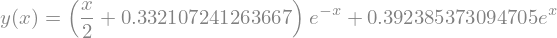

In [58]:
x = sp.symbols('x')
y = sp.Function('y')(x)
eq = -y.diff(x,x)+y-sp.exp(-x)
sol = sp.dsolve(eq, y, ics={y.subs(x, 0.5):1, y.subs(x, 1.5): 2})
sol

Calculando o erro quadrático médio

In [59]:
y_ex =(xi/2 + 0.332107241263667)*np.exp(-xi) + 0.392385373094705*np.exp(xi)

err = np.mean((yi-y_ex)**2)
print('Erro quadrático médio (11 pontos):',err)

Erro quadrático médio (11 pontos): 1.8502912502771752e-09


Plotando a solução numérica e a solução analítica

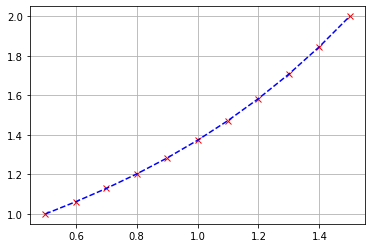

In [60]:
plt.plot(xi,yi,'rx', xi, y_ex,'b--' )
plt.grid()
plt.show()

**Exemplo 5:** Considere o seguinte problema de valor de contorno para a equação de calor no estado estacionário 

$$ \begin{cases} 
-y'' = 200e^{-(x-1)^2} \,\text{, } \,\,\,0<x<2\\
y'(0)=0\\ 
y(2)=100
\end{cases} $$

Aproxime a derivada segunda por um esquema de segunda ordem, a derivada primeira na fronteira por um esquema de primeira ordem e transforme a equação diferencial em um sistema de equações lineares. Resolva o sistema linear obtido.

*Solução exata com* `sympy`:

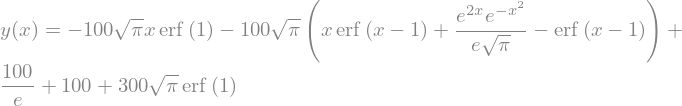

In [61]:
x = sp.symbols('x')
y = sp.Function('y')(x)
eq = y.diff(x,x) + 200*sp.exp(-(x-1)**2)
sol = sp.dsolve(eq, y, ics={y.diff(x).subs(x, 0):0, y.subs(x, 2): 100})
sol

Observe que a solução não pode ser expressa em termos de funções elementares. Nesse caso, a resolução numérica é a abordagem mais indicada.

*Solução numérica:*

Escolhendo uma discretização em 21 pontos no intervalo de 0 a 2, temos $h=0,2$. O esquema de fiferenças finitas de 1ª ordem na fronteira esquerda será dado pela equação

$$y'(x_i)\approx\ \frac{f(x_{i+1})-f(x_i)}{h}  \,\,\,\,\,\text{ou} \,\,\,\, y'_0=0\approx\frac{y_1-y_0}{0,1}$$

assim as equações fornecidas pelas condições de contorno são

$$ y_1-y_0 = 0 \,\,\,\,\,\text{e} \,\,\,\, y_{20}=100$$

As demais equações serão fornecidas pelo esquema de segunda ordem, ou seja, serão dadas por

$$ y''(x_i)= 200e^{-(xi-1)^2} \approx \frac{y_{i-1}-2y_i+y_{i+1}}{h^2}$$

que leva a 

$$ y_{i-1}-2y_i+y_{i+1}=2e^{-(xi-1)^2}  \,\,\,\,\,\text{para} \,\,\,\, i=1,...,19$$



Temos, portanto

$$ \begin{cases} 
y_0 - y_1 = 0\\
y_1 - 2y_1 + y_1= 2e^{-(0,2-1)^2}\\
y_2 - 2y_2 + y_3= 2e^{-(0,4-1)^2}\\
\vdots \\
y_{18} - 2y_{18} + y_{19}= 2e^{-(1,6-1)^2}\\
y_{19} - 2y_{18} + y_{19}= 2e^{-(1,8-1)^2}\\
y_{20}= 100
\end{cases} $$


xi= [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
A= [[ 1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
yi= [ 29.24196044  29.24196044  30.29654528  32.74648278  36.90070786
  42.97651182  51.05231577  61.04969861  72.75136902  85.84839209
 100.        ]


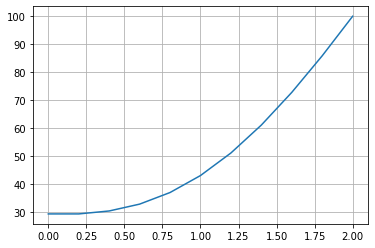

In [62]:
N = 11
x0 = 0.0
xn = 2.0
h = (xn-x0)/(N-1)
xi = np.linspace(x0, xn, N)  
print('xi=',xi)

A = np.zeros((N,N))  
b = np.zeros(N)  
 
# Condições de contorno
A[0,0] = 1
A[0,1] = -1
A[N-1,N-1] = 1
b[0] = 0
b[N-1] = 100

# montando as matrizes A e b
for i in np.arange(1,N-1):
    A[i,i-1] = 1  
    A[i,i] = -2
    A[i,i+1] = 1  
    b[i] = 2*np.exp(-(xi[i]-1)**2)  
print('A=',A)

#resolvendo o sistema
yi = np.linalg.solve(A,b)  
print('yi=',yi)

#plotando
plt.plot(xi,yi)
plt.grid()
plt.show()

## Exercícios:

(Adaptados de https://www.ufrgs.br/reamat/CalculoNumerico)**:**

**1.** Considere o seguinte problema de valor de contorno para a equação de calor no estado estacionário 

$$ \begin{cases} 
-y'' = 200e^{-(x-1)^2} \,\text{, } \,\,\,0<x<2\\
y(0)=120\\ 
y(2)=100
\end{cases} $$

Aproxime a derivada segunda por um esquema de segunda ordem, a derivada primeira na fronteira por um esquema de primeira ordem e transforme a equação diferencial em um sistema de equações lineares. Resolva o sistema linear obtido. Use uma discretização com 21 pontos.

**2.** Considere o seguinte problema de valor de contorno para a equação de calor no estado estacionário com um termo não linear de radiação

$$-y'' = 100 - \frac{y^4}{10000} \,\text{, } \,\,\,0<x<2$$
$$y(0)=0 \,\,\,\text{e}\,\,\, y(2)=10$$

Aproxime a derivada segunda por um esquema de segunda ordem, a derivada primeira na fronteira por um esquema de primeira ordem e transforme a equação diferencial em um sistema de equações lineares. Resolva o sistema linear obtido.

**3.** Considere o seguinte problema de valor de contorno para a equação de calor no estado estacionário com um termo não linear de radiação e um termo de convecção

$$-y'' +3y'= 100 - \frac{y^4}{10000} \,\text{, } \,\,\,0<x<2$$
$$y'(0)=0 \,\,\,\text{e}\,\,\, y(2)=10$$

Aproxime a derivada segunda por um esquema de segunda ordem, a derivada primeira na fronteira por um esquema de primeira ordem e transforme a equação diferencial em um sistema de equações lineares. Resolva o sistema linear obtido.